In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
mean_absolute_error, mean_squared_error, r2_score
)

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [28]:
df['default.payment.next.month'].value_counts(normalize=True)

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [29]:
X = df.drop(columns=['default.payment.next.month', 'ID'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
logreg_pipeline = Pipeline([
('scaler', StandardScaler()),
('model', LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [32]:
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

In [33]:
metrics_classification = {
'Accuracy': accuracy_score(y_test, y_pred),
'Precision': precision_score(y_test, y_pred),
'Recall': recall_score(y_test, y_pred),
'F1-score': f1_score(y_test, y_pred),
'ROC-AUC': roc_auc_score(y_test, y_proba)
}

pd.Series(metrics_classification)

Accuracy     0.807667
Precision    0.686825
Recall       0.239638
F1-score     0.355307
ROC-AUC      0.707636
dtype: float64

In [35]:
df_air = pd.read_csv("AirQuality.csv", sep=';', decimal=',')
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [36]:
# Удаляем пустые столбцы
df_air = df_air.dropna(axis=1, how='all')

# Заменяем -200 (пропуски) на NaN
df_air = df_air.replace(-200, np.nan)

# Удаляем строки с пропусками
df_air = df_air.dropna()

In [37]:
target = 'CO(GT)'

X = df_air.drop(columns=[target, 'Date', 'Time'])
y = df_air[target]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [40]:
linreg_pipeline = Pipeline([
('scaler', StandardScaler()),
('model', LinearRegression())
])

linreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [41]:
y_pred = linreg_pipeline.predict(X_test)

In [42]:
metrics_regression = {
'MAE': mean_absolute_error(y_test, y_pred),
'RMSE': mean_squared_error(y_test, y_pred, squared=False),
'R2': r2_score(y_test, y_pred)
}

pd.Series(metrics_regression)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE     0.177941
RMSE    0.240677
R2      0.972173
dtype: float64

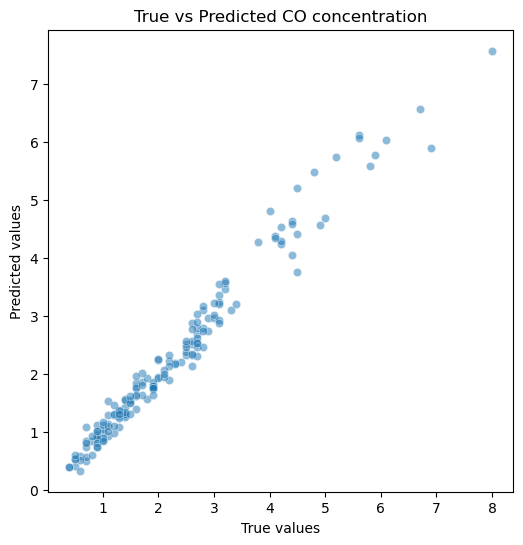

In [43]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted CO concentration')
plt.show()

In [44]:
X = df.drop(columns=['default.payment.next.month', 'ID'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
logreg_balanced = Pipeline([
('scaler', StandardScaler()),
('model', LogisticRegression(
max_iter=1000,
class_weight='balanced'
))
])

logreg_balanced.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [46]:
y_pred = logreg_balanced.predict(X_test)
y_proba = logreg_balanced.predict_proba(X_test)[:, 1]

In [47]:
pd.Series({
'Accuracy': accuracy_score(y_test, y_pred),
'Precision': precision_score(y_test, y_pred),
'Recall': recall_score(y_test, y_pred),
'F1': f1_score(y_test, y_pred),
'ROC-AUC': roc_auc_score(y_test, y_proba)
})

Accuracy     0.679667
Precision    0.367247
Recall       0.620196
F1           0.461323
ROC-AUC      0.708115
dtype: float64

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'model__C': [0.01, 0.1, 1, 10]
}

pipeline = Pipeline([
('scaler', StandardScaler()),
('model', LogisticRegression(
max_iter=1000,
class_weight='balanced'
))
])

grid = GridSearchCV(
pipeline,
param_grid,
cv=5,
scoring='f1',
n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=18515) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()


{'model__C': 0.01}

In [49]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [50]:
metrics_classification_improved = pd.Series({
'Accuracy': accuracy_score(y_test, y_pred),
'Precision': precision_score(y_test, y_pred),
'Recall': recall_score(y_test, y_pred),
'F1': f1_score(y_test, y_pred),
'ROC-AUC': roc_auc_score(y_test, y_proba)
})

metrics_classification_improved

Accuracy     0.679500
Precision    0.367083
Recall       0.620196
F1           0.461194
ROC-AUC      0.707595
dtype: float64

In [51]:
target = 'CO(GT)'

X = df_air.drop(columns=[target, 'Date', 'Time'])
y = df_air[target]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [52]:
from sklearn.linear_model import Ridge

param_grid = {
'model__alpha': [0.1, 1, 10, 50]
}

ridge_pipeline = Pipeline([
('scaler', StandardScaler()),
('model', Ridge())
])

grid_ridge = GridSearchCV(
ridge_pipeline,
param_grid,
cv=5,
scoring='r2',
n_jobs=-1
)

grid_ridge.fit(X_train, y_train)

grid_ridge.best_params_

{'model__alpha': 0.1}

In [53]:
best_ridge = grid_ridge.best_estimator_

y_pred = best_ridge.predict(X_test)

In [54]:
metrics_regression_improved = pd.Series({
'MAE': mean_absolute_error(y_test, y_pred),
'RMSE': mean_squared_error(y_test, y_pred, squared=False),
'R2': r2_score(y_test, y_pred)
})

metrics_regression_improved

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE     0.178048
RMSE    0.240624
R2      0.972186
dtype: float64

/var/folders/71/ldzwv_lj6hd7_9l8hjmq4gym0000gn/T/ipykernel_18515/805829009.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [67]:
class LogisticRegressionGD:
    def __init__(self, lr=0.01, n_iters=1000, l2=0.0, class_weight=None):
        self.lr = lr
        self.n_iters = n_iters
        self.l2 = l2
        self.class_weight = class_weight

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Ограничиваем значения
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        if self.class_weight == 'balanced':
            w0 = len(y) / (2 * np.sum(y == 0))
            w1 = len(y) / (2 * np.sum(y == 1))
            sample_weights = np.where(y == 1, w1, w0)
        else:
            sample_weights = np.ones_like(y)

        for _ in range(self.n_iters):
            linear = np.dot(X, self.w) + self.b
            y_pred = self._sigmoid(linear)
            error = y_pred - y

            dw = (1 / n_samples) * np.dot(X.T, error * sample_weights) + self.l2 * self.w
            db = (1 / n_samples) * np.sum(error * sample_weights)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return self._sigmoid(np.dot(X, self.w) + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


In [68]:
# стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

logreg_custom = LogisticRegressionGD(lr=0.05, n_iters=1500)
logreg_custom.fit(X_train, y_train)

In [71]:
# Преобразовать y в бинарные метки (например, выше/ниже медианы)
y_binary = (y > y.median()).astype(int)

# Разделить данные
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42
)

# Обучить модель
logreg_custom = LogisticRegressionGD(lr=0.01, n_iters=1500)
logreg_custom.fit(X_train, y_train)

# Предсказания
y_pred = logreg_custom.predict(X_test)

# Теперь метрики будут работать
metrics_custom_cls = pd.Series({
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_proba)
})

In [72]:
logreg_custom_improved = LogisticRegressionGD(
lr=0.1,
n_iters=2500,
l2=0.01,
class_weight='balanced'
)

logreg_custom_improved.fit(X_train, y_train)

In [73]:
y_pred = logreg_custom_improved.predict(X_test)
y_proba = logreg_custom_improved.predict_proba(X_test)

metrics_custom_cls_improved = pd.Series({
'Accuracy': accuracy_score(y_test, y_pred),
'Precision': precision_score(y_test, y_pred),
'Recall': recall_score(y_test, y_pred),
'F1': f1_score(y_test, y_pred),
'ROC-AUC': roc_auc_score(y_test, y_proba)
})
metrics_custom_cls_improved

Accuracy     0.969880
Precision    0.973684
Recall       0.961039
F1           0.967320
ROC-AUC      0.994747
dtype: float64

In [76]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, n_iters=1000, l2=0.0):
        self.lr = lr
        self.n_iters = n_iters
        self.l2 = l2
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.w) + self.b
            error = y_pred - y
            
            dw = (2 / n_samples) * np.dot(X.T, error) + self.l2 * self.w
            db = (2 / n_samples) * np.sum(error)
            
            self.w -= self.lr * dw
            self.b -= self.lr * db
    
    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42
)

linreg_gd = LinearRegressionGD(
lr=0.01,
n_iters=3000,
l2=0.1
)

linreg_gd.fit(X_train, y_train)

In [78]:
y_pred = linreg_gd.predict(X_test)

pd.Series({
'MAE': mean_absolute_error(y_test, y_pred),
'RMSE': mean_squared_error(y_test, y_pred, squared=False),
'R2': r2_score(y_test, y_pred)
})

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE     0.190720
RMSE    0.256294
R2      0.968445
dtype: float64